This notebook is designed to be a guide on how to use the package MendelGWAS in Open Mendel to perform a Genome Wide Association Study (GWAS). It will cover performing a GWAS on both qualitative and quantitative tratits (linear and logistic regression). 

The data we will be using is from the Mendel version 16 sample files. The data is described in examples under Option 24 in the Mendel Version 16 Manual [Section 24.4,  page 250](http://www.genetics.ucla.edu/software/Mendel_current_doc.pdf). It consists of simulated data where the traits (binary and quantitative) of interest have two contributing SNPs and an interaction between them.

First, add MendelGWAS.jl to your computer if it's not already installed.

In [1]:
Pkg.clone("https://github.com/OpenMendel/MendelGWAS.jl.git")

For reproducability information, run versioninfo()

In [2]:
versioninfo()

Julia Version 0.6.2
Commit d386e40c17 (2017-12-13 18:08 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin14.5.0)
  CPU: Intel(R) Core(TM) i7-4850HQ CPU @ 2.30GHz
  WORD_SIZE: 64
  BLAS: libopenblas (USE64BITINT DYNAMIC_ARCH NO_AFFINITY Haswell)
  LAPACK: libopenblas64_
  LIBM: libopenlibm
  LLVM: libLLVM-3.9.1 (ORCJIT, haswell)


MendelGWAS requires a `.txt` file as input with certain fields in order to run the analysis with additional optional fields for further customization and additional analyses.

Required Arguments:

`pedigree_file` is the file with your covariates. Note: The covariate file must have a row of 1s labeled Person. 

`snpdefinition_file` is the file where your SNPs are defined (snp, chromosome, basepair).

`snpdata_file` is the file with your SNP data.

or alternatively instead of the three above, you can use:

`plink_input_basename` which is the basename of the plink file.

`output_file` is the file that is outputted with the results.

`regression` is the choice of regression.

`regression_formula` is the formula for the regression written in R-like syntax. The left hand side of formula (to the left of `~`) is the trait variable. 

$\hspace{5mm}$

Optional arguments:

`manhattan_plot_file` is the name of the .png file for the manhattan plot generated from the analysis. A Manhattan Plot will only be generated if this argument is in the `.txt` file. 

`lrt_threshold` default is set to 5e-8.

`maf_threshold` default is set to 0.01.

`min_success_rate_per_sample` default is set to 0.98.

`min_success_rate_per_snp`  default is set to 0.98.

`pcs` is the number of Principal Components to calculate and include in the model, default is set to 0.

Ensure your directory is set to the correct location containing all relevant files using:

`;cd path`

$\bf{Qualitative}$ $\bf{GWAS}$

We will first demonstrate using MendelGWAS to perform an analysis with a dichotomous trait such as disease presence or absence. 
You will need to have a `.txt` file that has the required information as well as optional keywords. The example file we will use for the analysis is shown below. 

In [3]:
;cat qualControl.txt

#
# Input and Output files.
#
pedigree_file = gwasped.txt
snpdefinition_file = gwassnpdef.txt
snpdata_file = gwasdata.bed
output_file = qualOutput.txt
manhattan_plot_file = qualManhattanPlotOutput.png
#
# Analysis parameters for GWAS option.
#
regression = logistic
regression_formula = Case_Control ~ Sex + BMI

To run the analysis, simply specify 'Using MendelGWAS' and then enter the commend GWAS("file.txt").

In [4]:
using MendelGWAS
GWAS("qualControl.txt")

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.1.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  control_file = qualControl.txt
  manhattan_plot_file = qualManhattanPlotOutput.png
  output_file = qualOutput.txt
  pedigree_file = gwasped.txt
  regression = logistic
  regression_formula = Case_Control ~ Sex + BMI
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwassnpdef.txt
 


INFO: v1.0 BED file detected


 
Analyzing the data.



 
Creating a Manhattan plot from the GWAS results.

 
 
Mendel's analysis is finished.



Now to check on the results. They are stored in the designated output file in the same directory. The file contains the base model information as well as significant SNPs and relevant information for them. In the Analysis, there were 2 SNPs detected to be potentially significant (p-value < 0.05/number of snps), so only their output is included in the output file. 

In [5]:
;cat qualOutput.txt

 
Summary for Base Model with Formula: Case_Control ~ Sex + BMI
Regression model: logistic
Link function: canonical
Base components' effect estimates: 
   (Intercept) : -0.699975
   Sex : 0.0132831
   BMI : -0.00875774
Base model loglikelihood: -1315.0784
 
 

Summary for SNP rs1935681
 on chromosome 6 at basepair 112651205
SNP p-value: 1.515e-9
Minor allele frequency: 0.2523
Hardy-Weinberg p-value: 0.3666
SNP effect estimate: -0.4831
SNP model loglikelihood: -1296.8209
 

Summary for SNP rs2256412
 on chromosome 12 at basepair 41913108
SNP p-value: 6.68e-21
Minor allele frequency: 0.4741
Hardy-Weinberg p-value: 0.1844
SNP effect estimate: -0.6371
SNP model loglikelihood: -1271.0984
 
 
 
        P-value   Number of Passing
FDR    Threshold     Predictors 

0.01    0.00000           2
0.05    0.00000           2
0.10    0.00000           2
0.20    0.00000           2
0.30    0.00000           2
0.40    0.00000           2
0.50    0.00000           2
0.60    0.00044           8
0.70    

For benchmarking purposes: 

In [6]:
using BenchmarkTools
@benchmark GWAS("qualControl.txt")

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.1.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  control_file = qualControl.txt
  manhattan_plot_file = qualManhattanPlotOutput.png
  output_file = qualOutput.txt
  pedigree_file = gwasped.txt
  regression = logistic
  regression_formula = Case_Control ~ Sex + BMI
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwassnpdef.txt
 


INFO: v1.0 BED file detected


 
Analyzing the data.



 
Creating a Manhattan plot from the GWAS results.

 
 
Mendel's analysis is finished.

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.1.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  control_file = qualControl.txt
  manhattan_plot_file = qualManhattanPlotOutput.png
  output_file = qualOutput.txt
  pedigree_file = gwasped.txt
  regression = logistic
  regression_formula = Case_Control ~ Sex + BMI
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwassnpdef.txt
 


INFO: v1.0 BED file detected


 
Analyzing the data.



 
Creating a Manhattan plot from the GWAS results.

 
 
Mendel's analysis is finished.

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.1.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  control_file = qualControl.txt
  manhattan_plot_file = qualManhattanPlotOutput.png
  output_file = qualOutput.txt
  pedigree_file = gwasped.txt
  regression = logistic
  regression_formula = Case_Control ~ Sex + BMI
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwassnpdef.txt
 


INFO: v1.0 BED file detected


 
Analyzing the data.



 
Creating a Manhattan plot from the GWAS results.

 
 
Mendel's analysis is finished.

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.1.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  control_file = qualControl.txt
  manhattan_plot_file = qualManhattanPlotOutput.png
  output_file = qualOutput.txt
  pedigree_file = gwasped.txt
  regression = logistic
  regression_formula = Case_Control ~ Sex + BMI
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwassnpdef.txt
 


INFO: v1.0 BED file detected


 
Analyzing the data.



 
Creating a Manhattan plot from the GWAS results.

 
 
Mendel's analysis is finished.

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.1.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  control_file = qualControl.txt
  manhattan_plot_file = qualManhattanPlotOutput.png
  output_file = qualOutput.txt
  pedigree_file = gwasped.txt
  regression = logistic
  regression_formula = Case_Control ~ Sex + BMI
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwassnpdef.txt
 


INFO: v1.0 BED file detected


 
Analyzing the data.



 
Creating a Manhattan plot from the GWAS results.

 
 
Mendel's analysis is finished.

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.1.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  control_file = qualControl.txt
  manhattan_plot_file = qualManhattanPlotOutput.png
  output_file = qualOutput.txt
  pedigree_file = gwasped.txt
  regression = logistic
  regression_formula = Case_Control ~ Sex + BMI
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwassnpdef.txt
 


INFO: v1.0 BED file detected


 
Analyzing the data.



 
Creating a Manhattan plot from the GWAS results.

 
 
Mendel's analysis is finished.

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.1.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  control_file = qualControl.txt
  manhattan_plot_file = qualManhattanPlotOutput.png
  output_file = qualOutput.txt
  pedigree_file = gwasped.txt
  regression = logistic
  regression_formula = Case_Control ~ Sex + BMI
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwassnpdef.txt
 


INFO: v1.0 BED file detected


 
Analyzing the data.



 
Creating a Manhattan plot from the GWAS results.

 
 
Mendel's analysis is finished.



BenchmarkTools.Trial: 
  memory estimate:  1.72 GiB
  allocs estimate:  1860357
  --------------
  minimum time:     3.194 s (8.81% GC)
  median time:      3.242 s (9.16% GC)
  mean time:        3.242 s (9.16% GC)
  maximum time:     3.291 s (9.51% GC)
  --------------
  samples:          2
  evals/sample:     1

A Manhattan Plot was generated from the analysis, this gives you a clear way to visualize where the significant hits are coming from and if any other SNPs were close to hitting the potentially significant boundary. 

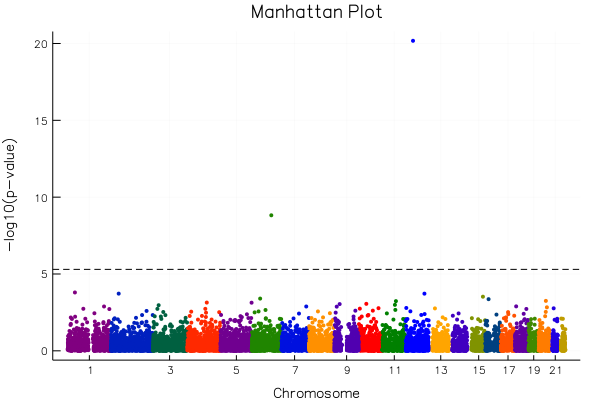

In [7]:
display("image/png", read("qualManhattanPlotOutput.png"))

$\bf{Quantitative}$ $\bf{GWAS}$

We will now run the analysis on the same SNP dataset, but using a quantitative trait variable instead. For the quantiative analysis, we need to specific the quantitative variable on the left hand side in the

`regression_formula` section of the .txt file (in our example, Trait).

You also must specify the regression as linear instead of logistic on the 
   
`regression` argument in the .txt file. 

In [13]:
;cat quantControl.txt

#
# Input and Output files.
#
plink_input_basename = gwasdata
output_file = quantOutput.txt
manhattan_plot_file = quantgwasManhattanPlotOutput.png
#
# Analysis parameters for GWAS option.
#
regression = linear
regression_formula = Trait ~ Sex


In [9]:
using MendelGWAS
GWAS("quantControl.txt")

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.1.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  affected_designator = 2
  control_file = quantControl.txt
  manhattan_plot_file = quantgwasManhattanPlotOutput.png
  output_file = quantOutput.txt
  pedigree_file = gwasdata.fam
  plink_input_basename = gwasdata
  regression = linear
  regression_formula = Trait ~ Sex
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwasdata.bim
 


INFO: v1.0 BED file detected


 
Analyzing the data.



 
Creating a Manhattan plot from the GWAS results.

 
 
Mendel's analysis is finished.



We can check the output `.txt` file from the analysis. You can see that two SNPs had pvalues under the threshold, so their relevant information is displayed in the .txt file generated along with the regression results. 

In [10]:
;cat quantOutput.txt

 
Summary for Base Model with Formula: Trait ~ Sex
Regression model: linear
Link function: canonical
Base components' effect estimates: 
   (Intercept) : 0.142482
   Sex : -0.0129378
Base model loglikelihood: -1258.177
 
 

Summary for SNP rs1935681
 on chromosome 6 at basepair 112651205
SNP p-value: 1.124e-11
Minor allele frequency: 0.2523
Hardy-Weinberg p-value: 0.3666
SNP effect estimate: -0.2496
SNP model loglikelihood: -1235.1273
Proportion of base-model variance explained: 0.0207
 

Summary for SNP rs2256412
 on chromosome 12 at basepair 41913108
SNP p-value: 1.431e-34
Minor allele frequency: 0.4741
Hardy-Weinberg p-value: 0.1844
SNP effect estimate: -0.3857
SNP model loglikelihood: -1182.9861
Proportion of base-model variance explained: 0.0661
 
 
 
        P-value   Number of Passing
FDR    Threshold     Predictors 

0.01    0.00000           2
0.05    0.00000           2
0.10    0.00000           2
0.20    0.00009           5
0.30    0.00021           8
0.40    0.00048        

For benchmarking purposes

In [11]:
using BenchmarkTools
@benchmark GWAS("quantControl.txt")

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.1.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  affected_designator = 2
  control_file = quantControl.txt
  manhattan_plot_file = quantgwasManhattanPlotOutput.png
  output_file = quantOutput.txt
  pedigree_file = gwasdata.fam
  plink_input_basename = gwasdata
  regression = linear
  regression_formula = Trait ~ Sex
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwasdata.bim
 


INFO: v1.0 BED file detected


 
Analyzing the data.



 
Creating a Manhattan plot from the GWAS results.

 
 
Mendel's analysis is finished.

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.1.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  affected_designator = 2
  control_file = quantControl.txt
  manhattan_plot_file = quantgwasManhattanPlotOutput.png
  output_file = quantOutput.txt
  pedigree_file = gwasdata.fam
  plink_input_basename = gwasdata
  regression = linear
  regression_formula = Trait ~ Sex
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwasdata.bim
 


INFO: v1.0 BED file detected


 
Analyzing the data.



 
Creating a Manhattan plot from the GWAS results.

 
 
Mendel's analysis is finished.

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.1.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  affected_designator = 2
  control_file = quantControl.txt
  manhattan_plot_file = quantgwasManhattanPlotOutput.png
  output_file = quantOutput.txt
  pedigree_file = gwasdata.fam
  plink_input_basename = gwasdata
  regression = linear
  regression_formula = Trait ~ Sex
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwasdata.bim
 


INFO: v1.0 BED file detected


 
Analyzing the data.



 
Creating a Manhattan plot from the GWAS results.

 
 
Mendel's analysis is finished.

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.1.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  affected_designator = 2
  control_file = quantControl.txt
  manhattan_plot_file = quantgwasManhattanPlotOutput.png
  output_file = quantOutput.txt
  pedigree_file = gwasdata.fam
  plink_input_basename = gwasdata
  regression = linear
  regression_formula = Trait ~ Sex
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwasdata.bim
 


INFO: v1.0 BED file detected


 
Analyzing the data.



 
Creating a Manhattan plot from the GWAS results.

 
 
Mendel's analysis is finished.

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.1.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  affected_designator = 2
  control_file = quantControl.txt
  manhattan_plot_file = quantgwasManhattanPlotOutput.png
  output_file = quantOutput.txt
  pedigree_file = gwasdata.fam
  plink_input_basename = gwasdata
  regression = linear
  regression_formula = Trait ~ Sex
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwasdata.bim
 


INFO: v1.0 BED file detected


 
Analyzing the data.



 
Creating a Manhattan plot from the GWAS results.

 
 
Mendel's analysis is finished.

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.1.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  affected_designator = 2
  control_file = quantControl.txt
  manhattan_plot_file = quantgwasManhattanPlotOutput.png
  output_file = quantOutput.txt
  pedigree_file = gwasdata.fam
  plink_input_basename = gwasdata
  regression = linear
  regression_formula = Trait ~ Sex
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwasdata.bim
 


INFO: v1.0 BED file detected


 
Analyzing the data.



 
Creating a Manhattan plot from the GWAS results.

 
 
Mendel's analysis is finished.

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.1.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  affected_designator = 2
  control_file = quantControl.txt
  manhattan_plot_file = quantgwasManhattanPlotOutput.png
  output_file = quantOutput.txt
  pedigree_file = gwasdata.fam
  plink_input_basename = gwasdata
  regression = linear
  regression_formula = Trait ~ Sex
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwasdata.bim
 


INFO: v1.0 BED file detected


 
Analyzing the data.

 
Creating a Manhattan plot from the GWAS results.

 
 
Mendel's analysis is finished.

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.1.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  affected_designator = 2
  control_file = quantControl.txt
  manhattan_plot_file = quantgwasManhattanPlotOutput.png
  output_file = quantOutput.txt
  pedigree_file = gwasdata.fam
  plink_input_basename = gwasdata
  regression = linear
  regression_formula = Trait ~ Sex
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwasdata.bim
 


 
Analyzing the data.



INFO: v1.0 BED file detected


 
Creating a Manhattan plot from the GWAS results.

 
 
Mendel's analysis is finished.



BenchmarkTools.Trial: 
  memory estimate:  614.93 MiB
  allocs estimate:  2550890
  --------------
  minimum time:     2.404 s (5.35% GC)
  median time:      2.408 s (5.49% GC)
  mean time:        2.413 s (5.47% GC)
  maximum time:     2.426 s (5.57% GC)
  --------------
  samples:          3
  evals/sample:     1

The Manhattan Plot is generated and stored under the file name that was set. 

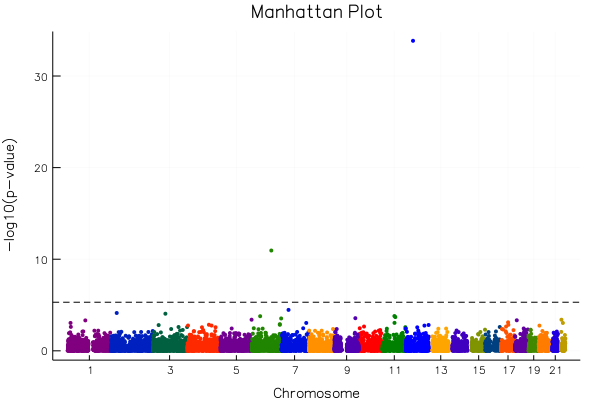

In [12]:
display("image/png", read("quantgwasManhattanPlotOutput.png"))